In [ ]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


Ниже продемонстрирована работа сети на датасете из 30 картинок с числами 1, 5, 7.

In [ ]:
# Датасет из 30 картинок, рукописные числа 1, 5, 7.
!wget -O dataset.zip 'https://drive.google.com/uc?id=1_7SAo5kbaObJpqrPPAlezkRWZa-nq9NQ'
!unzip /content/dataset.zip -d /content/

In [ ]:
images = []


labels = 10 * ['1'] + 10 * ['5'] + 10 * ['7']

label_mapping = {'1': 0, '5': 1, '7': 2}
numeric_labels = np.array([label_mapping[label] for label in labels])

    # Работаем с датасетом из 30 картинок.

for im_num in range(1, 31):
    img = np.invert(cv2.imread(f"digits2/digit_{im_num}.png")[:, :, 0])
    images.append(img)

images = np.array(images)
labels = np.array(labels)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, numeric_labels, test_size=0.1, random_state=42, shuffle=True)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dense(3, activation='softmax'))


X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

# собираем модель
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# обучаем модель
model.fit(X_train, y_train, epochs = 1000, validation_data=(X_test, y_test), verbose = False)
model.save('digits.model')

1/1 [==============================] - 0s 171ms/step - loss: 0.9573 - accuracy: 0.6667
Test loss: 0.9572852253913879
Test accuracy: 0.6666666865348816
1/1 [==============================] - 0s 68ms/step
True Label: 7
Predicted Label: 7



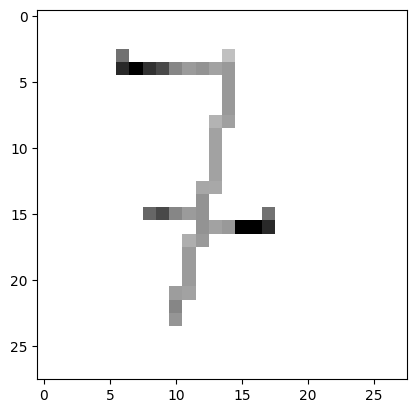

True Label: 5
Predicted Label: 5



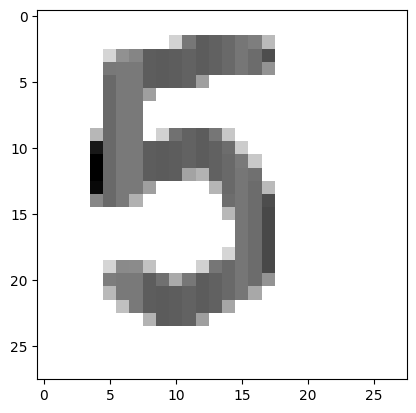

True Label: 7
Predicted Label: 5



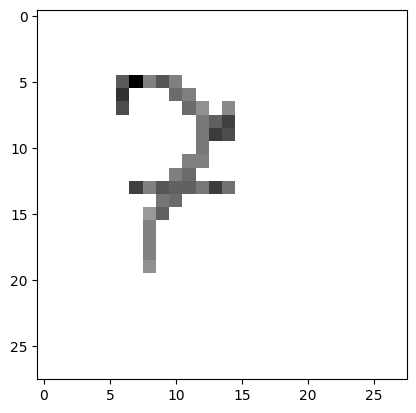

In [ ]:
model = tf.keras.models.load_model('digits.model')

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

# выводим результаты модели на тестовой выборке
predictions = model.predict(X_test)

for i in range(len(predictions)):
  predicted_label = np.argmax(predictions[i])
  true_label = np.argmax(y_test[i])

  print(f"True Label: {list(label_mapping.keys())[list(label_mapping.values()).index(true_label)]}")
  print(f"Predicted Label: {list(label_mapping.keys())[list(label_mapping.values()).index(predicted_label)]}\n")

  plt.imshow(X_test[i], cmap=plt.cm.binary)
  plt.show()



Ниже продемонстрирована работа точно такой же сети, но на датасети из 60 картинок с числами от 0 до 9.

In [ ]:
# Датасет из 60 картинок, рукописные числа от 0 до 9. Плохая точность (0.25-0.33).
!wget -O dataset.zip 'https://drive.google.com/uc?id=1Lvr4umhNQHdS1TOBNf-Id7gsd49nDbz5'
!unzip /content/dataset.zip -d /content/

In [ ]:
images = []


labels = 6 * [0] + 6 * [1] + 6 * [2] + 6 * [3] + 6 * [4] + 6 * [5] + 6 * [6] + 6 * [7] +  6 * [8] + 6 * [9]

for im_num in range(1, 61):
  img = np.invert(cv2.imread(f"dig/digit_{im_num}.png")[:, :, 0])
  images.append(img)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42, shuffle=True)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# собираем модель
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# обучаем модель
model.fit(X_train, y_train, epochs = 1000, validation_data=(X_test, y_test), verbose = False)
model.save('dig.model')

1/1 [==============================] - 0s 158ms/step - loss: 4.2052 - accuracy: 0.3333
Test loss: 4.2052001953125
Test accuracy: 0.3333333432674408
1/1 [==============================] - 0s 65ms/step
Predicted: 3
Real: 0


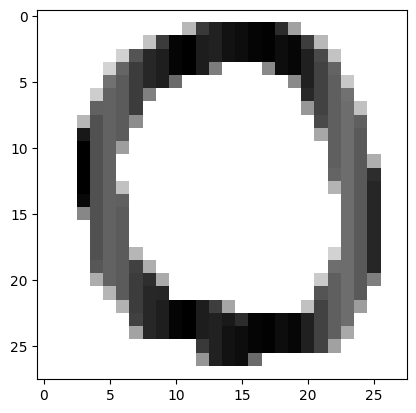

Predicted: 1
Real: 0


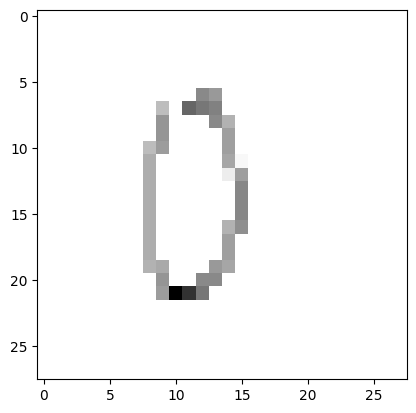

Predicted: 6
Real: 6


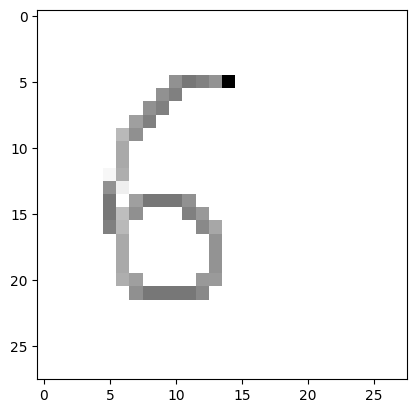

Predicted: 7
Real: 7


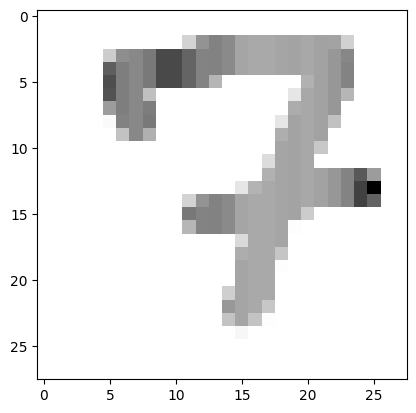

Predicted: 9
Real: 2


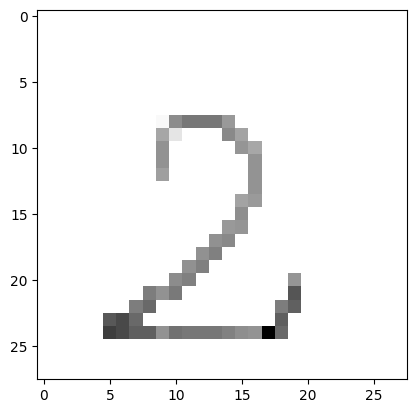

Predicted: 5
Real: 9


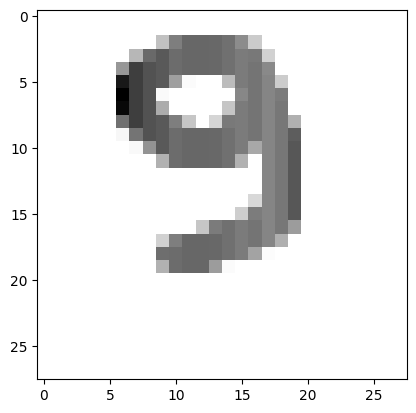

In [ ]:
model = tf.keras.models.load_model('dig.model')

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

# выводим результаты модели на тестовой выборке
predictions = model.predict(X_test)

'''
for i in range(len(X_test)):
  x = np.expand_dims(X_test[i], axis=0)
  prediction = model.predict(x)
  print(f"This digit is a {np.argmax(prediction)}")
  plt.imshow(x[0], cmap=plt.cm.binary)
  plt.show()

'''
for i in range(len(predictions)):
  predicted_label = np.argmax(predictions[i])
  true_label = np.argmax(y_test[i])
  print(f"Predicted: {predicted_label}")
  print(f"Real: {true_label}")
  plt.imshow(X_test[i], cmap=plt.cm.binary)
  plt.show()